In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from matplotlib import pyplot as plt
import numpy as np

In [6]:
IMAGE_SIZE = 150
BATCH_SIZE = 128
CHANNELS = 3
EPOCHS = 20

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    shuffle=True,
    image_size=(150, 150),
    batch_size = BATCH_SIZE,
)

Found 1835 files belonging to 30 classes.


In [8]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
class_names = dataset.class_names
n_classes = len(class_names)
class_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [63]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [64]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [65]:
resize_and_rescale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [66]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [67]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

model.build(input_shape=input_shape)

In [68]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 32)       128       
 hNormalization)                                                 
                                                     

In [69]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
)

Epoch 1/20
12/12 [==============================] - 25s 2s/step - loss: 5.3841 - accuracy: 0.2722 - val_loss: 47.6369 - val_accuracy: 0.0469
Epoch 2/20
12/12 [==============================] - 22s 2s/step - loss: 1.6718 - accuracy: 0.5830 - val_loss: 17.9423 - val_accuracy: 0.1719
Epoch 3/20
12/12 [==============================] - 24s 2s/step - loss: 0.9267 - accuracy: 0.7416 - val_loss: 9.0244 - val_accuracy: 0.3203
Epoch 4/20
12/12 [==============================] - 29s 2s/step - loss: 0.4691 - accuracy: 0.8613 - val_loss: 7.0605 - val_accuracy: 0.3281
Epoch 5/20
12/12 [==============================] - 30s 2s/step - loss: 0.2443 - accuracy: 0.9221 - val_loss: 8.3476 - val_accuracy: 0.3125
Epoch 6/20
12/12 [==============================] - 25s 2s/step - loss: 0.1268 - accuracy: 0.9649 - val_loss: 4.3562 - val_accuracy: 0.4141
Epoch 7/20
12/12 [==============================] - 22s 2s/step - loss: 0.0853 - accuracy: 0.9752 - val_loss: 5.2577 - val_accuracy: 0.4688
Epoch 8/20
12/12 [

In [71]:
scores = model.evaluate(test_ds) 

2/2 [==============================] - 4s 336ms/step - loss: 0.0157 - accuracy: 1.0000


In [72]:
print(f"Loss : {scores[0]}, Accuracy : {scores[1]*100}%")

history.history['accuracy']

Loss : 0.015712078660726547, Accuracy : 100.0%


[0.2722260653972626,
 0.5830461978912354,
 0.7415575385093689,
 0.861328125,
 0.9221226572990417,
 0.9648517966270447,
 0.9751895070075989,
 0.9903514981269836,
 0.9944865703582764,
 0.9944865703582764,
 0.9972432851791382,
 0.9979324340820312,
 0.9965540766716003,
 0.9972432851791382,
 0.9972432851791382,
 0.9972432851791382,
 0.99609375,
 0.9993107914924622,
 1.0,
 1.0]

In [73]:
def predict(model, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Actual label : Pongamia Pinnata (Indian Beech)
Predicted label : Pongamia Pinnata (Indian Beech)


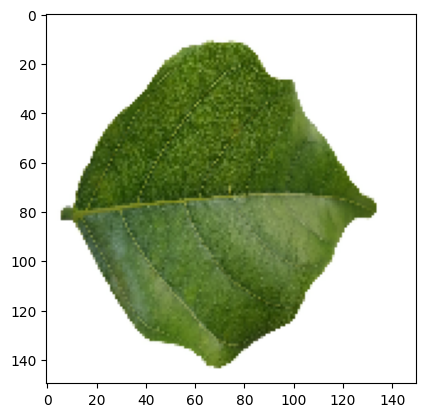

In [78]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    plt.imshow(first_image)
    print(f"Actual label : {class_names[first_label]}")
    
    batch_prediction = model.predict(images_batch, verbose=0)
    print(f"Predicted label : {class_names[np.argmax(batch_prediction[0])]}")

In [76]:
# model_version='version_3'
# model.save(f"./saved_models/{model_version}")